In [1]:
import networkx as nx
%matplotlib inline

In [7]:
net = nx.read_graphml("data/florentine.graphml")

/Users/hanisaf/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


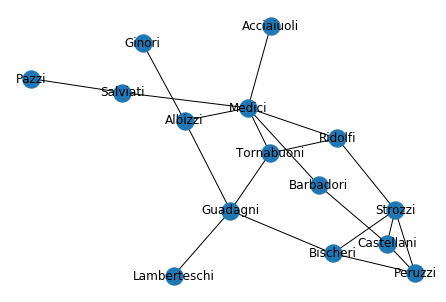

In [8]:
nx.draw(net, with_labels=True)

# Network Structure

In [9]:
nx.degree(net)

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [10]:
nx.degree_histogram(net)

[0, 4, 2, 6, 2, 0, 1]

In [23]:
import pandas as pd
df = pd.DataFrame(nx.degree_histogram(net)).reset_index()
df.columns=["degree", "count"]
df

,degree,count
0,0,0
1,1,4
2,2,2
3,3,6
4,4,2
5,5,0
6,6,1


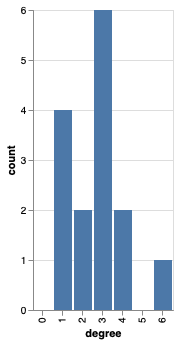

In [27]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(df).mark_bar().encode(x='degree:N', y='count')

In [11]:
nx.density(net)

0.19047619047619047

In [30]:
nx.average_shortest_path_length(net)

2.4857142857142858

In [31]:
nx.average_clustering(net)

0.16

## Node structural properties

In [12]:
nx.clustering(net)

{'Acciaiuoli': 0,
 'Medici': 0.06666666666666667,
 'Castellani': 0.3333333333333333,
 'Peruzzi': 0.6666666666666666,
 'Strozzi': 0.3333333333333333,
 'Barbadori': 0,
 'Ridolfi': 0.3333333333333333,
 'Tornabuoni': 0.3333333333333333,
 'Albizzi': 0,
 'Salviati': 0,
 'Pazzi': 0,
 'Bischeri': 0.3333333333333333,
 'Guadagni': 0,
 'Ginori': 0,
 'Lamberteschi': 0}

In [13]:
nx.closeness_centrality(net)

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

In [14]:
nx.betweenness_centrality(net)

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

In [15]:
nx.eigenvector_centrality(net)

{'Acciaiuoli': 0.1321573195285342,
 'Medici': 0.4303154258349923,
 'Castellani': 0.2590200378423514,
 'Peruzzi': 0.2757224374104833,
 'Strozzi': 0.3559730326460451,
 'Barbadori': 0.2117057470647985,
 'Ridolfi': 0.3415544259074365,
 'Tornabuoni': 0.325846704169574,
 'Albizzi': 0.2439605296754477,
 'Salviati': 0.14592084164171834,
 'Pazzi': 0.044814939703863084,
 'Bischeri': 0.2827943958713356,
 'Guadagni': 0.2891171573226501,
 'Ginori': 0.0749245316027793,
 'Lamberteschi': 0.08879253113499548}

In [16]:
nx.pagerank(net)

{'Acciaiuoli': 0.03065721480230426,
 'Medici': 0.14581844065218275,
 'Castellani': 0.06933028447008721,
 'Peruzzi': 0.06787531774407572,
 'Strozzi': 0.08809849082725613,
 'Barbadori': 0.050300712744633685,
 'Ridolfi': 0.069574170990148,
 'Tornabuoni': 0.07127928374676082,
 'Albizzi': 0.079121502380729,
 'Salviati': 0.061302640987807314,
 'Pazzi': 0.036054222996734095,
 'Bischeri': 0.0688615381141211,
 'Guadagni': 0.09839859717156552,
 'Ginori': 0.032418257716596434,
 'Lamberteschi': 0.03090932465499793}

## Community structure

In [29]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(net)
communities

[frozenset({'Acciaiuoli',
            'Medici',
            'Pazzi',
            'Ridolfi',
            'Salviati',
            'Tornabuoni'}),
 frozenset({'Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'}),
 frozenset({'Albizzi', 'Ginori', 'Guadagni', 'Lamberteschi'})]